cfr      445.504515
cfr14    127.774904
dtype: float64


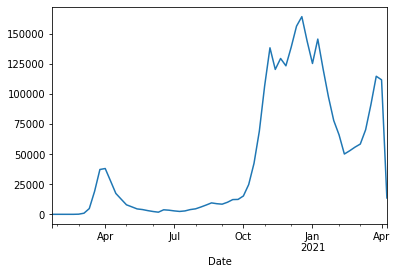

In [13]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import json
from datetime import datetime
import plotly.express as px


data = pd.read_csv("time-series-19-covid-combined.csv", index_col='Date', parse_dates=True, dayfirst=False) 
data_rki = pd.read_json("rki.json")
#for country in data['Country/Region'].unique():
#    print(country)
# Preview the first 5 lines of the loaded data 
#data = data[data['Country/Region']=='Italy']
data = data[data['Country/Region']=='Germany']
#data = data[data['Country/Region']=='US']
#data = data[data['Country/Region']=='Czechia']
data['CM10']=data['Confirmed'].shift(10)
# Daten der letzen 100 Tage
dd=data['Deaths'][-100:]
dc=data['Confirmed'][-100:]
dd=dd-dd[0]
dc_14=dc.shift(14)
dc=dc-dc[0]
data['cfr']=100*dd/dc
data['cfr14']=100*dd/dc_14
data['ineu']=data['Confirmed'].diff(1)
data['ineu10']=data['CM10'].diff(1)
data['mki']=0.06*data['ineu']
data['dneu']=data['Deaths'].diff(1)
dr = data.resample('W').ineu.sum()


# Infektionsrate ist: wieviele wurden heute gegenüber der letzten Zeit neu infiziert
# berechne ich mal mit Mittelwert gestern und heute im Verhältnis zu Mittelwert der 
# letzten drei Tage (gestern vorgestern und vorvorgestern)
data['avg_new_2d']=data['ineu'].rolling(2).mean()
data['avg_new_l3d']=data['ineu'].shift(1).rolling(5).mean()
data['infection_rate']=data['avg_new_2d']/data['avg_new_l3d']

#data['cfr']=100*data['dneu']/data['ineu']
#data['cfr10']=100*data['dneu']/data['ineu10']
# data.head()
d = data[['cfr','cfr14']]
#d = data['infection_rate']
#d = data['dneu']
#print(d[-14:])
#d = d.rolling(5).median()
#d = data['Deaths'].diff(1).rolling(7).median()
print(d.sum())
plt.figure()
p = dr.plot() 
#p.set_yscale('log')
#p.set_ylim(0,20)

#d.plot(kind='bar')

#print(data['ineu'].sum()*0.06)

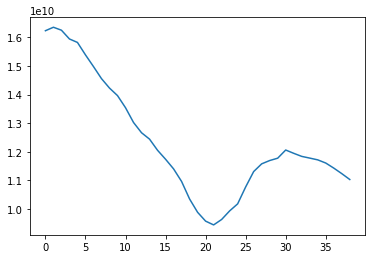

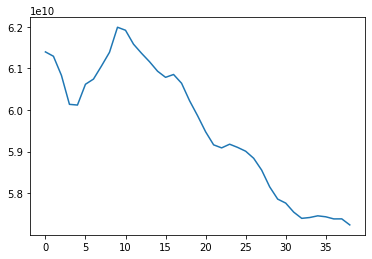

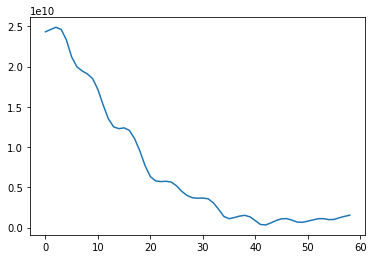

In [8]:
def get_corr( data, idx1, idx2, tage, max_tage):
    # von beiden Indizes die letzten 90 Tage und index 1 shiften um X Tage
    max_len = data[idx1].size
    max_len -= tage
    max_len = min([max_len,max_tage])
    data_1 = data[idx1].shift(tage)[-max_len:]
    data_2 = data[idx2][-max_len:]
    ## normalisieren
    #data_1 = (data_1-data_1.min())/(data_1.max()-data_1.min())
    #data_2 = (data_2-data_2.min())/(data_2.max()-data_2.min())
    diff = data_1-data_2
    diff_2 = diff*diff
    return diff_2.sum()

def get_corr2( data_1, data_2, tage, max_len):
    # von beiden Indizes die letzten 90 Tage und index 1 shiften um X Tage
    d1 = data_1.shift(tage)
    d1 = d1[-max_len:]
    d2 = data_2[-max_len:]
    ## normalisieren
    diff = d1-d2
    diff_2 = diff*diff
    return diff_2.sum()


data = pd.read_csv("time-series-19-covid-combined.csv", index_col='Date', parse_dates=True, dayfirst=False) 
data = data[data['Country/Region']=='Germany']
data_rki = pd.read_json("rki.json", convert_dates=True)
data_rki = data_rki.set_index('dates', drop=True)
data = data.join( data_rki )

# Annahme: 2% Krankenhaus, 1% Tote
data_1 = data['Confirmed'][-100:].diff(1).rolling(5).mean()
data_2 = (data['faelle']/0.02).diff(1).rolling(5).mean()
data_3 = (data['Deaths']/0.02).diff(1).rolling(5).mean()

diffs=[]
for latenz in range( 1, 40):
    diffs.append( get_corr2( data_1, data_2, latenz, 90))

plt.figure()
plt.plot(diffs)


diffs=[]
for latenz in range( 1, 40):
    diffs.append( get_corr2( data_2, data_3, latenz, 90))

plt.figure()
plt.plot(diffs)

diffs=[]
for latenz in range( 1, 60):
    diffs.append( get_corr2( data_1, data_3, latenz, 90))

plt.figure()
plt.plot(diffs)




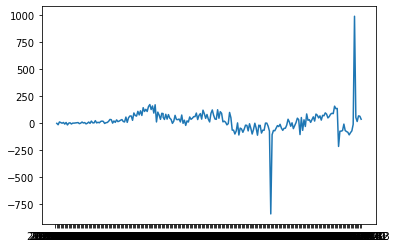

In [9]:
data_rki = pd.read_json("rki.json", convert_dates=True)
data_rki = data_rki.set_index('dates', drop=True)

data_rki['steigerung'] = data_rki['faelle'].diff(1)
plt.figure()
plt.plot(data_rki['steigerung'])

In [10]:
data_rki = pd.read_json("rki.json", convert_dates=True)
data_rki = data_rki.set_index('dates', drop=True)
print(data_rki)
data_rki = data_rki.resample('W').mean()


plt.figure()
plt.plot(data_rki['faelle'][-140:])

            faelle
dates             
2020-08-24     240
2020-08-25     238
2020-08-26     223
2020-08-27     234
2020-08-28     239
...            ...
2021-04-09    4490
2021-04-10    4505
2021-04-11    4572
2021-04-12    4636
2021-04-13    4672

[233 rows x 1 columns]


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [11]:
tests = pd.read_excel("https://covid.ourworldindata.org/data/owid-covid-data.xlsx",engine='openpyxl')

In [ ]:
tests.columns

In [ ]:
testsd = tests[tests["iso_code"]=="DEU"].copy()
testsd = testsd[~tests["positive_rate"].isnull()].reset_index()
testr = testsd[["date","positive_rate"]].copy()

In [ ]:
plt.figure()
plt.plot(testr["date"][-20:],testr["positive_rate"][-20:])

In [ ]:
#kh_sn = pd.read_json("https://www.coronavirus.sachsen.de/corona-statistics/rest/hospitalDevelopment.jsp")

In [18]:

with open('hospitalDevelopment.json') as data_file:    
    data = json.load(data_file)
num_bed_dates = [pd.to_datetime(int(x)/1000,unit="s") for [x,y] in data["numberOfBeds"]]
num_beds = [y for [x,y] in data["numberOfBeds"]]
num_itc_beds = [y for [x,y] in data["numberOfItsBeds"]]

occ_bed_dates = [pd.to_datetime(int(x)/1000,unit="s") for [x,y] in data["numberOfOccupiedBeds"]]
occ_beds = [y for [x,y] in data["numberOfOccupiedBeds"]]
occ_itc_beds = [y for [x,y] in data["numberOfOccupiedItsBeds"]]

df = pd.DataFrame(data={"date":occ_bed_dates,"num_beds":occ_beds})

In [19]:
fig = px.line(df, x="date", y="num_beds", title='Anzahl Betten')
fig.show()